# Visualisation of Feature Selection Performance on benchmark open datasets

## Overview
This notebook displays the chosen performance metrics on the benchmark datasets.

Adapted from the notebook by the authors of the Powershap python package available at https://github.com/predict-idlab/powershap

Orignal Notebook: https://github.com/predict-idlab/powershap/blob/main/examples/visualisation_powershap.ipynb



## Dataset Information
- Madelon, https://www.openml.org/d/1485
- Gina priori, https://www.openml.org/d/1042
- Scene, https://www.openml.org/d/312
- The UK Biobank is an open access resource and bona fide researchers can apply to use the UK Biobank dataset by registering and applying at https://www.ukbiobank.ac.uk/enable-yourresearch/register.


## Notes
- Change metric to AUC, ACCURACY, RECALL, F1, PRECISION or AUC_PRC.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


### With CatBoost Default Model

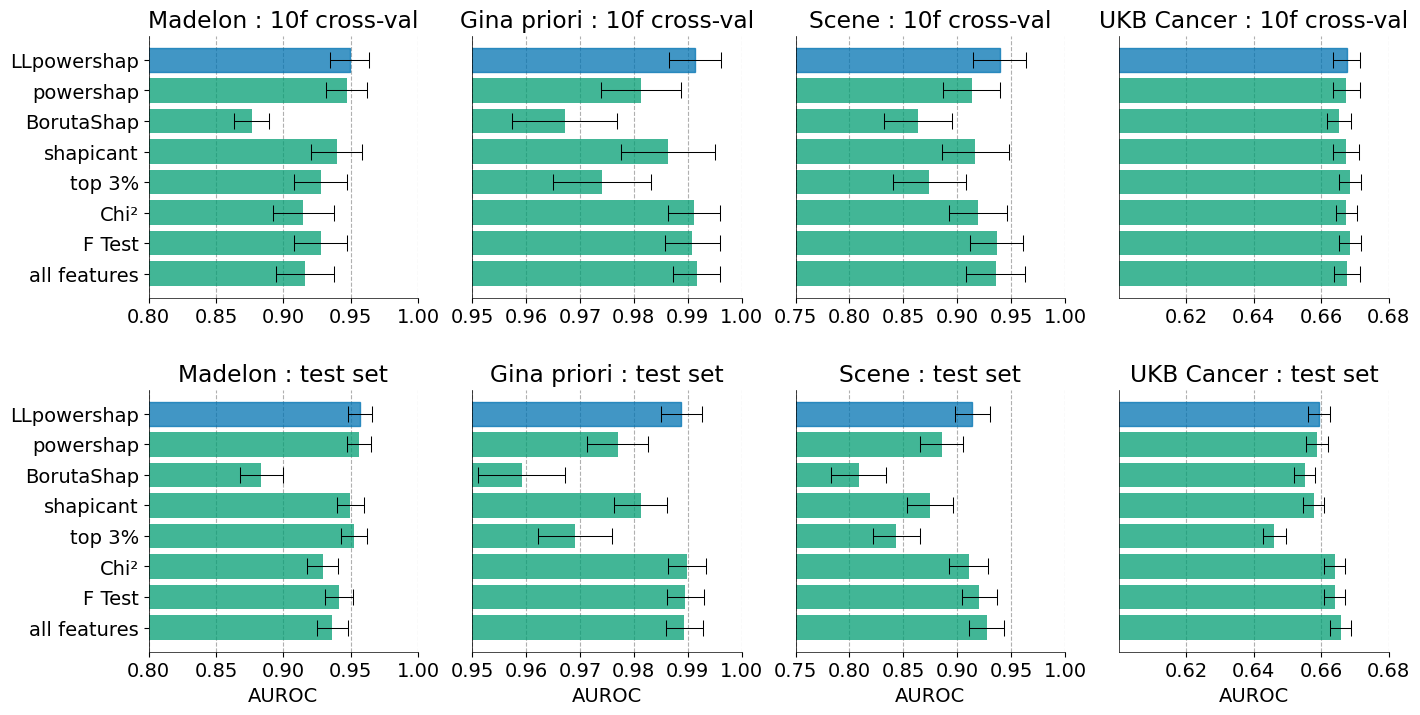

In [34]:
sub = 'xgb_250_git'
metric = "AUC"
tm = '_with_cb_default'


method_names = {'llpowershap': 'LLpowershap', 'powershap': 'powershap', 'borutashap': 'BorutaShap', 'shapicant': 'shapicant',
                  'top_3_percent': 'top 3%', 'chi_squared': 'Chi²', 'f_test': 'F Test', 'default': 'all features',
               }

datasets = {'madelon': 'Madelon', 'gina_priori': 'Gina priori', 'scene': 'Scene', 'ukb_cancer': 'UKB Cancer'}
tests = {'10_fold_cross_val': '10f cross-val', '1000_bootstrap' : 'test set'}

# Set the overall font size
mpl.rcParams['font.size'] = 14

# Set the font family to 'DejaVu Sans' or 'Arial'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'  # or 'Arial'

order = list(reversed(['llpowershap', 'powershap','borutashap', 'shapicant', 'top_3_percent', 'chi_squared','f_test', 'default']))
i = 0
f, axs = plt.subplots(2,4,figsize=(16,8))

color_palette = sns.color_palette("colorblind", n_colors=10)

for test in ['10_fold_cross_val', '1000_bootstrap']:
    j = 0
    for dataset in datasets.keys():
        current_db = pd.read_csv(f'../results/{sub}/{dataset}_{test}_results{tm}.csv')
        current_db = current_db[(current_db.data == 'test')]
        forplot_df = current_db.groupby(by=['method'])[metric].agg(['mean', 'std'])
        forplot_df['method'] = forplot_df.index
        forplot_df['method'] = forplot_df.method.apply(lambda s : method_names[s])
        forplot_df = forplot_df.reindex(order)
        barplot_object = axs[i][j].barh(forplot_df.method.values, forplot_df['mean'].values, 
                                        xerr=forplot_df['std'].values, color=color_palette[2],alpha=0.75,
                                        error_kw={'capsize': 6, 'elinewidth': 0.75, 'capthick': 0.75, 'ecolor':'black'})
           

        barplot_object[-1].set_color(color_palette[0])
        if i == 1:
            if metric == 'AUC':
                axs[i][j].set_xlabel('AUROC')
            else:
                axs[i][j].set_xlabel(metric)

        if j == 0:
            axs[i][j].tick_params(axis='y')
        else:
            axs[i][j].get_yaxis().set_visible(False)

       
        if j == 2:  #scene
            axs[0][j].set_xlim([0.75,1.0])
            axs[0][j].set_xticks([0.75, 0.80,0.85,0.90,0.95,1.0])
            axs[1][j].set_xlim([0.75,1.0])
            axs[1][j].set_xticks([0.75, 0.80,0.85,0.90,0.95,1.0])
        
        elif j == 1:
            axs[0][j].set_xlim([0.95,1.0])
            axs[0][j].set_xticks([0.95, 0.96,0.97,0.98,0.99,1.0])
            axs[1][j].set_xlim([0.95,1.0])
            axs[1][j].set_xticks([0.95, 0.96,0.97,0.98,0.99,1.0])
        elif j == 3:
            axs[0][j].set_xlim([0.6,0.68])
            axs[0][j].set_xticks([0.62, 0.64, 0.66, 0.68])
            axs[1][j].set_xlim([0.6,0.68])
            axs[1][j].set_xticks([0.62, 0.64, 0.66, 0.68])        
        else:
            axs[0][j].set_xlim([0.80,1.0])
            axs[0][j].set_xticks([0.80, 0.85,0.90,0.95,1.0])
            axs[1][j].set_xlim([0.80,1.0])
            axs[1][j].set_xticks([0.80, 0.85,0.90,0.95,1.0])
        
        
        axs[i][j].set_title(datasets[dataset] + " : "+tests[test])
        axs[i][j].xaxis.grid(True,linestyle='--')
        axs[i][j].set_axisbelow(True)

        j += 1
    i += 1


for a in range(i):
    for b in range(j):
        axs[a][b].spines['right'].set_visible(False)
        axs[a][b].spines['top'].set_visible(False)
        axs[a][b].spines['left'].set_linewidth(0.5)  
        axs[a][b].spines['bottom'].set_linewidth(0.5) 


plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.jpg", bbox_inches="tight", dpi=600)
plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.pdf", bbox_inches="tight", dpi=600)
plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.svg", bbox_inches="tight", dpi=600)
plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.png", bbox_inches="tight", dpi=600)


### With LightGBM Default Model

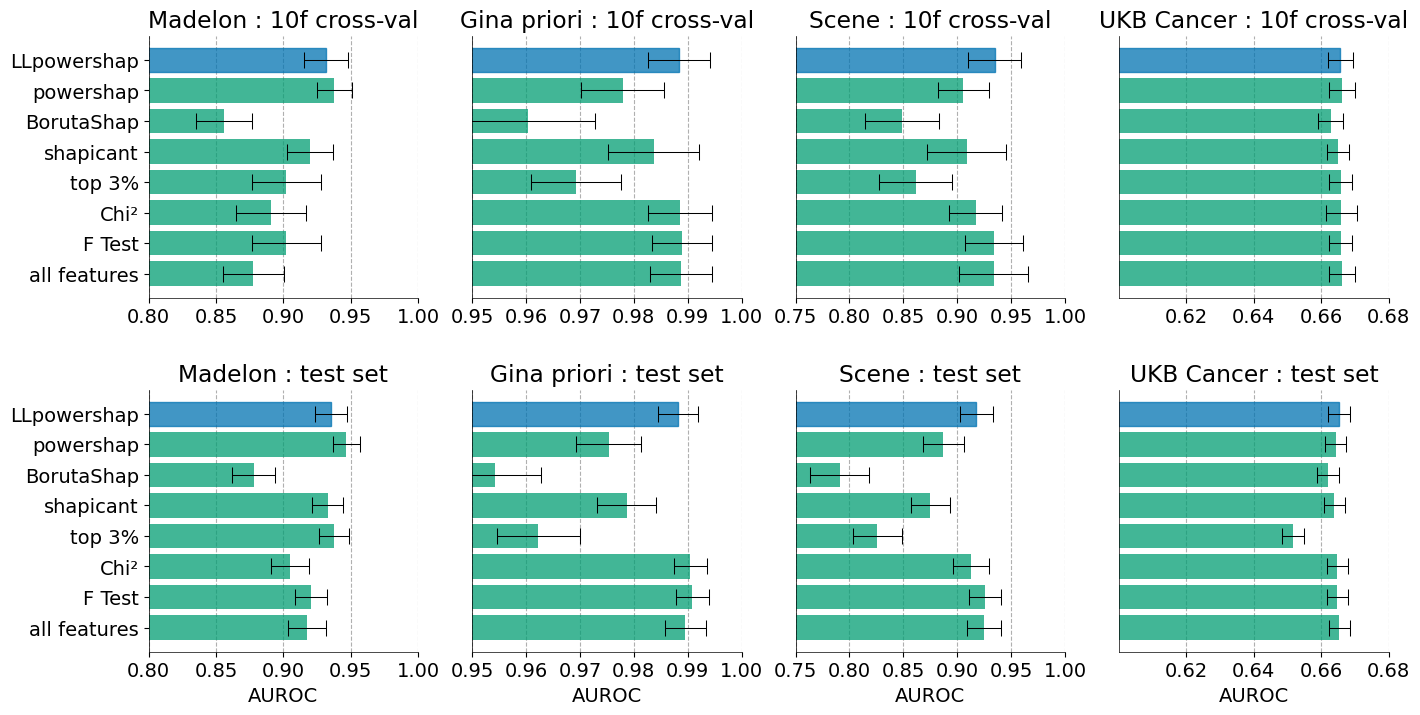

In [33]:
sub = 'xgb_250_git'
metric = "AUC"
tm = '_with_lgb_default'


method_names = {'llpowershap': 'LLpowershap', 'powershap': 'powershap', 'borutashap': 'BorutaShap', 'shapicant': 'shapicant',
                  'top_3_percent': 'top 3%', 'chi_squared': 'Chi²', 'f_test': 'F Test', 'default': 'all features',
               }

datasets = {'madelon': 'Madelon', 'gina_priori': 'Gina priori', 'scene': 'Scene', 'ukb_cancer': 'UKB Cancer'}
tests = {'10_fold_cross_val': '10f cross-val', '1000_bootstrap' : 'test set'}

# Set the overall font size
mpl.rcParams['font.size'] = 14

# Set the font family to 'DejaVu Sans' or 'Arial'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'  # or 'Arial'

order = list(reversed(['llpowershap', 'powershap','borutashap', 'shapicant', 'top_3_percent', 'chi_squared','f_test', 'default']))
i = 0
f, axs = plt.subplots(2,4,figsize=(16,8))

color_palette = sns.color_palette("colorblind", n_colors=10)

for test in ['10_fold_cross_val', '1000_bootstrap']:
    j = 0
    for dataset in datasets.keys():
        current_db = pd.read_csv(f'../results/{sub}/{dataset}_{test}_results{tm}.csv')
        current_db = current_db[(current_db.data == 'test')]
        forplot_df = current_db.groupby(by=['method'])[metric].agg(['mean', 'std'])
        forplot_df['method'] = forplot_df.index
        forplot_df['method'] = forplot_df.method.apply(lambda s : method_names[s])
        forplot_df = forplot_df.reindex(order)
        barplot_object = axs[i][j].barh(forplot_df.method.values, forplot_df['mean'].values, 
                                        xerr=forplot_df['std'].values, color=color_palette[2],alpha=0.75,
                                        error_kw={'capsize': 6, 'elinewidth': 0.75, 'capthick': 0.75, 'ecolor':'black'})
           

        barplot_object[-1].set_color(color_palette[0])
        if i == 1:
            if metric == 'AUC':
                axs[i][j].set_xlabel('AUROC')
            else:
                axs[i][j].set_xlabel(metric)

        if j == 0:
            axs[i][j].tick_params(axis='y')
        else:
            axs[i][j].get_yaxis().set_visible(False)

       
        if j == 2:  #scene
            axs[0][j].set_xlim([0.75,1.0])
            axs[0][j].set_xticks([0.75, 0.80,0.85,0.90,0.95,1.0])
            axs[1][j].set_xlim([0.75,1.0])
            axs[1][j].set_xticks([0.75, 0.80,0.85,0.90,0.95,1.0])
        
        elif j == 1:
            axs[0][j].set_xlim([0.95,1.0])
            axs[0][j].set_xticks([0.95, 0.96,0.97,0.98,0.99,1.0])
            axs[1][j].set_xlim([0.95,1.0])
            axs[1][j].set_xticks([0.95, 0.96,0.97,0.98,0.99,1.0])
        elif j == 3:
            axs[0][j].set_xlim([0.6,0.68])
            axs[0][j].set_xticks([0.62, 0.64, 0.66, 0.68])
            axs[1][j].set_xlim([0.6,0.68])
            axs[1][j].set_xticks([0.62, 0.64, 0.66, 0.68])        
        else:
            axs[0][j].set_xlim([0.80,1.0])
            axs[0][j].set_xticks([0.80, 0.85,0.90,0.95,1.0])
            axs[1][j].set_xlim([0.80,1.0])
            axs[1][j].set_xticks([0.80, 0.85,0.90,0.95,1.0])
        
        
        axs[i][j].set_title(datasets[dataset] + " : "+tests[test])
        axs[i][j].xaxis.grid(True,linestyle='--')
        axs[i][j].set_axisbelow(True)

        j += 1
    i += 1


for a in range(i):
    for b in range(j):
        axs[a][b].spines['right'].set_visible(False)
        axs[a][b].spines['top'].set_visible(False)
        axs[a][b].spines['left'].set_linewidth(0.5)  
        axs[a][b].spines['bottom'].set_linewidth(0.5) 


plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.jpg", bbox_inches="tight", dpi=600)
plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.pdf", bbox_inches="tight", dpi=600)
plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.svg", bbox_inches="tight", dpi=600)
plt.savefig(f"../results/{sub}/benchmark_datasets_cross_val_and_bootstrap_{tm}.png", bbox_inches="tight", dpi=600)